<a href="https://colab.research.google.com/github/yugen11/journey-of-yugen/blob/main/Yugen_Photos_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yugen Photos Classifications

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print('tf version:' , tf.__version__)
print('tf_hub version:' , hub.__version__)
# Check GPU availability
print("GPU is available" if tf.config.list_physical_devices("GPU") else "GPU not available" )

tf version: 2.11.0
tf_hub version: 0.12.0
GPU not available


#Get our data ready and  turn them into tensors

In [ ]:
import pandas as pd
names = pd.read_csv("/content/drive/MyDrive/Yugen_Vision/yugen_labels.csv")

In [ ]:
names

,id,name
0,A01,yugen
1,A02,yugen
2,A03,thivi
3,A04,yugen
4,A05,thivi
5,A06,thivi
6,A08,danish
7,A10,danish
8,A11,yunus
9,A12,yunus


In [ ]:
names["id"].value_counts()

A01    1
A02    1
A36    1
A40    1
A37    1
A27    1
A26    1
A19    1
A18    1
A17    1
A13    1
A12    1
A11    1
A10    1
A08    1
A06    1
A05    1
A04    1
A03    1
A41    1
Name: id, dtype: int64

# Create pathnames for image ID

In [ ]:
filenames = ["/content/drive/MyDrive/Yugen_Vision/train/" + fname + ".png" for fname in names["id"]]

In [ ]:
filenames

['/content/drive/MyDrive/Yugen_Vision/train/A01.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A02.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A03.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A04.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A05.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A06.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A08.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A10.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A11.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A12.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A13.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A17.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A18.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A19.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A26.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A27.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A37.png',
 '/content/drive/MyDrive/Yugen_Vision/train/A40.png',
 '/content/drive/MyDrive/Yug

In [ ]:
len(filenames)

20

In [ ]:
import os
if len(os.listdir("/content/drive/MyDrive/Yugen_Vision/train")) == len(filenames):
  print("The number of filenames and images matches...Proceed!!!")
else:
  print("The number does not match..check pannuda baadi soda")

The number of filenames and images matches...Proceed!!!


In [ ]:
len(os.listdir("/content/drive/MyDrive/Yugen_Vision/train"))

20

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Yugen_Vision/train/A37.png')

## Prepare labels

In [ ]:
import numpy as np
name = names["name"]
name = np.array(name)
name


array(['yugen', 'yugen', 'thivi', 'yugen', 'thivi', 'thivi', 'danish',
       'danish', 'yunus', 'yunus', 'danish', 'pravin', 'pravin', 'pravin',
       'jeeva', 'jeeva', 'jeeva', 'logen', 'logen', 'logen'], dtype=object)

In [ ]:
len(name)

20

In [ ]:
if len(name) == len(filenames):
  print("Data matches...proceed!!")
else:
  print("Does not match...abort!!")

Data matches...proceed!!


In [ ]:
#find unique name values
unique_name = np.unique(name)
unique_name

array(['danish', 'jeeva', 'logen', 'pravin', 'thivi', 'yugen', 'yunus'],
      dtype=object)

In [ ]:
len(unique_name)

7

In [ ]:
print(name[0])
name[0] == unique_name

yugen


array([False, False, False, False, False,  True, False])

In [ ]:
#turn every name into boolean array
boolean_name = [label == unique_name for label in name]
boolean_name[:2]

[array([False, False, False, False, False,  True, False]),
 array([False, False, False, False, False,  True, False])]

In [ ]:
len(boolean_name)

20

In [ ]:
# Turn boolean array into integers
print(name[0]) # original name
print(np.where(unique_name==name[0])) #index where label occurs
print(boolean_name[0].argmax()) #index where label occurs in boolean array
print(boolean_name[0].astype(int)) #there will be a 1 where the sample label occur

yugen
(array([5]),)
5
[0 0 0 0 0 1 0]


### Since number of data is less, we don't need a validation data

In [ ]:
# Setup X and y variables
X = filenames
y = boolean_name

In [ ]:
#set number of images to be used
NUM_IMAGES = 20 #@param {type:"slider" , min:1 , max:20 , step:1}

#### We won't split our data into training and validation set since we have small amount of data so we skip that step

# Proceed to preprocessing images
-turning images into tensors
- to preprocess our images wee are going to write a function which does a few things
- take an image filepath as input
- use tensorflow to read the file save into a variable image
- turn our image png into tensors
- normalizeour image (convert colour channel values from 0-255 to 0-1 values
- resize the imge into the shape of (224,224)
- return the modified image

In [ ]:
# convert image into numpy array
from matplotlib.pyplot import imread
image = imread(filenames[19]) # index  rang from 0 to 19 because we have 20 images only
image.shape

(4032, 3024, 4)

In [ ]:
image.max() , image.min()

(1.0, 0.0)

In [ ]:
image[:2]

array([[[0.24705882, 0.2509804 , 0.19607843, 1.        ],
        [0.2509804 , 0.25490198, 0.2       , 1.        ],
        [0.25882354, 0.2627451 , 0.20784314, 1.        ],
        ...,
        [0.5647059 , 0.5294118 , 0.53333336, 1.        ],
        [0.56078434, 0.5254902 , 0.5294118 , 1.        ],
        [0.56078434, 0.5254902 , 0.5294118 , 1.        ]],

       [[0.24705882, 0.2509804 , 0.19607843, 1.        ],
        [0.2509804 , 0.25490198, 0.2       , 1.        ],
        [0.25882354, 0.2627451 , 0.20784314, 1.        ],
        ...,
        [0.56078434, 0.5254902 , 0.5294118 , 1.        ],
        [0.56078434, 0.5254902 , 0.5294118 , 1.        ],
        [0.56078434, 0.5254902 , 0.5294118 , 1.        ]]], dtype=float32)

In [ ]:
# turn a image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 3024, 4), dtype=float32, numpy=
array([[[0.24705882, 0.2509804 , 0.19607843, 1.        ],
        [0.2509804 , 0.25490198, 0.2       , 1.        ],
        [0.25882354, 0.2627451 , 0.20784314, 1.        ],
        ...,
        [0.5647059 , 0.5294118 , 0.53333336, 1.        ],
        [0.56078434, 0.5254902 , 0.5294118 , 1.        ],
        [0.56078434, 0.5254902 , 0.5294118 , 1.        ]],

       [[0.24705882, 0.2509804 , 0.19607843, 1.        ],
        [0.2509804 , 0.25490198, 0.2       , 1.        ],
        [0.25882354, 0.2627451 , 0.20784314, 1.        ],
        ...,
        [0.56078434, 0.5254902 , 0.5294118 , 1.        ],
        [0.56078434, 0.5254902 , 0.5294118 , 1.        ],
        [0.56078434, 0.5254902 , 0.5294118 , 1.        ]]], dtype=float32)>

### let's preprocess


In [ ]:
IMG_SIZE = 224

#Create a function for preprocessing image

def process_image(image_path , img_size = IMG_SIZE):
  """
  Takes an image file path and turns the image into a tensor
  """
  #Read in an image file

  image = tf.io.read_file(image_path)

  #Turn the png image into numerical tensor with three colour channels (Red,Green,Blue)
  image = tf.image.decode_png(image , channels = 3)

  #Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image , tf.float32)

  #Resize the image (224,224)
  image = tf.image.resize(image , size =(IMG_SIZE , IMG_SIZE))

  return image

## Turning our data into batches
Why turn data into batches?

Let's say you are trying to process 10000++ images in one go..they might not fit into the memory.

So that's why we do 32 images at a time(this is the batch size)(you can manually adjust the batch size)

In order to use tensorflow effectively, we need our data in the form of tensor tuples which look like this: (image,label)

In [ ]:
# Create a simple fucntion which returns a tuple (image,label)
def get_image_label(image_path, label):

  """
  Takes the image file path name and the label , processes the image and returns a tupple of (image,label)
  """
  
  image = process_image(image_path)
  return image , label

In [ ]:
# Define the batch size , 32 is a good start
BATCH_SIZE = 32

#Create a function to turn data into batches
def create_data_batches(X, y , batch_size = BATCH_SIZE , valid_data = False , test_data = False):
  """
  this function creates batches of data out of image(X) and label(y) pairs.
  Shuffles the data if it's a training data but does't shuffle if it's validation data
  also accepts test data as input (no label)
  """
  print("Creating training data batch")
    #Turn filepaths and labels into tensors
  data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))

  #Shuffling path names and labels before mapping image processer function is faster than shuffling images
  data = data.shuffle(buffer_size = len(X))

  #Create (image,label) tupples. This also turns the image path into a preprocessed image
  data = data.map(get_image_label)

  #Turn the training data into batches
  data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create Data Batches
data_yugen = create_data_batches(X,y)

Creating training data batch


In [ ]:
#Checkout the different attribute of our data batches
data_yugen.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 7), dtype=tf.bool, name=None))

### Visualizing Data batches
our data is now in batches. but however it's hard to understand.so let's visualie them


In [ ]:
import matplotlib.pyplot as plt

#Create a function to view images in a data batch
def show_20_images(images, labels):
  """
  displays a plot of 20 images and their labels from a data batch
  """

  #Setup a figure
  plt.figure(figsize=(10,10))

  #Loop through 25 for displaying 25 images
  for i in range(20):
    #create subplots(5rows ,5 columns)
    ax = plt.subplot(5, 5, i+1 )
    #Display an image
    plt.imshow(images[i])

    #Add the image label as the title
    plt.title(unique_name[labels[i].argmax()])
    #turn the gridlines off
    #plt.axis("off")



In [ ]:
images , labels = next(data_yugen.as_numpy_iterator())

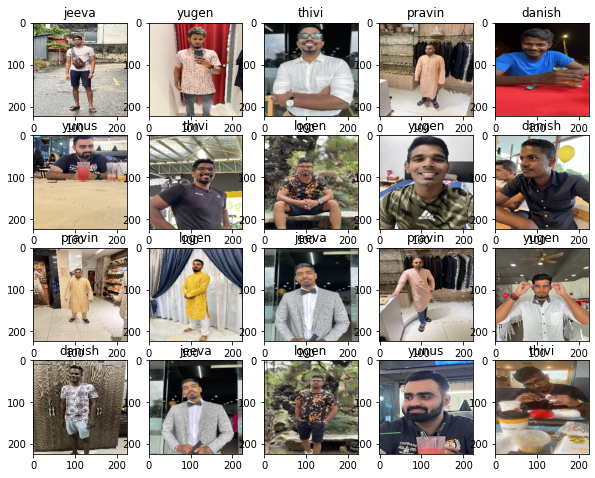

In [ ]:
#lets visualize the data in batches
images, labels = next(data_yugen.as_numpy_iterator())
show_20_images(images , labels)

### Building a model
Before we build a model, there a few things we need to define:

- input shape (images shape) in the form of tensors to our model
- the output shape (image labels, in the form of tensors) of our model_selection
- the URL of our model we want to use from tensor flow hub: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [ ]:
#Setup input shape to the model
INPUT_SHAPE = [None , IMG_SIZE , IMG_SIZE , 3] #batch , height , width and colour channel

#Setup output shape
OUTPUT_SHAPE = len(unique_name)

#Setup model URL from tensor flow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

#### Now we have our inputs, outputs and model ready to go. Let's put it together into a Keras Deep Learning Model.

Let's create a function:

- that takes the input shape, output shape and the model that we have chosen as parameters.
- defines the layers in a keras model in sequential fashion
- compiles the model (says how it should be evaluated and improved)
- Builds the model (tells the model the input shape that it will be getting).
- finally returns the model
- all these steps can be found here: https://www.tensorflow.org/guide/keras/sequential_model

In [ ]:
# Create a function which builds the keras model
def create_model(input_shape = INPUT_SHAPE , output_shape = OUTPUT_SHAPE , model_url = MODEL_URL):
  print("building model with:" , MODEL_URL)

  #Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #Layer1 which is the input layer
      tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                            activation = "softmax") #layer2 which is the output layer
  ])

  #compile the model
  model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
  
  #Build the model
  model.build(INPUT_SHAPE)

  return model


In [ ]:
model = create_model()
model.summary()

building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 7)                 7014      
                                                                 
Total params: 5,439,727
Trainable params: 7,014
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating Callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving

We will create two callbacks for tensorboard to track model progress and another callback to prevent early stopping which prevents our model from training too long

TensorBoard Calback
To setup tensorboard callback we need 3 things: 
- 1) Load the tensorboard notebook extension 
- 2) create a tensorboard callback which is able to save logs to a directory and pass it to our model's fit function. 
- 3) Visualize our models training logs with %tensorboard magic function(we'll do this after model training)

In [ ]:
## Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# create a function to build a tensorboard callback
def create_tensorboard_callback():
  #create a log directory for storing tensorboard logs
  logdir = os.path.join("/content/drive/MyDrive/Yugen_Vision/logs" , datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy" , patience=3)

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider" , min:10 , max:100 , step:10}

In [ ]:
# Build a function to train and return a trained model

def Yugen_model():
  """
  trains a given model and returns the trained version
  """

  #Create a model
  model = create_model()

  #Create new tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  #Fit the model to the data passing it the callbacks we created
  model.fit(x = data_yugen,
            epochs = NUM_EPOCHS,
            validation_data = None,
            validation_freq = 1,
            callbacks = [tensorboard , early_stopping])
  #Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = Yugen_model()

building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
1/1 [==============================] - 16s 16s/step - loss: 3.5022 - accuracy: 0.1500
Epoch 2/100
1/1 [==============================] - 8s 8s/step - loss: 2.7994 - accuracy: 0.2000
Epoch 3/100
1/1 [==============================] - 10s 10s/step - loss: 2.2012 - accuracy: 0.4000
Epoch 4/100
1/1 [==============================] - 8s 8s/step - loss: 1.7069 - accuracy: 0.4500
Epoch 5/100
1/1 [==============================] - 9s 9s/step - loss: 1.3018 - accuracy: 0.5500
Epoch 6/100
1/1 [==============================] - 10s 10s/step - loss: 0.9726 - accuracy: 0.7000
Epoch 7/100
1/1 [==============================] - 8s 8s/step - loss: 0.7086 - accuracy: 0.7000
Epoch 8/100
1/1 [==============================] - 11s 11s/step - loss: 0.5018 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 10s 10s/step - loss: 0.3473 - accuracy: 1.0000
Epoch 10/100
1/1 [===============

In [ ]:
#Make predictions on the data 
predictions = model.predict(data_yugen , verbose =1)
predictions

1/1 [==============================] - 29s 29s/step


array([[9.68199670e-01, 1.90055551e-04, 4.26106562e-04, 2.76647886e-04,
        1.76897869e-02, 1.07176006e-02, 2.50002416e-03],
       [1.62255857e-02, 3.10776010e-03, 1.17509881e-04, 1.39798785e-05,
        2.11100467e-02, 3.42347175e-02, 9.25190449e-01],
       [1.92075577e-02, 8.95771757e-02, 8.19924995e-02, 7.70966941e-03,
        1.11086387e-02, 7.86448181e-01, 3.95619590e-03],
       [7.64583528e-01, 1.54434547e-01, 1.13883670e-02, 4.52493727e-02,
        7.57649774e-04, 2.33621355e-02, 2.24369171e-04],
       [3.43389111e-03, 8.95064510e-03, 2.36050431e-02, 3.30927502e-03,
        9.36664939e-01, 2.04350930e-02, 3.60101624e-03],
       [7.58888498e-02, 2.39319215e-03, 1.06275012e-03, 6.53222669e-04,
        1.20226964e-02, 8.98862123e-01, 9.11724102e-03],
       [8.74257460e-03, 8.21957707e-01, 2.13650241e-02, 1.89865716e-02,
        4.75024432e-02, 6.33372590e-02, 1.81084462e-02],
       [4.25384641e-02, 7.91634679e-01, 8.16974565e-02, 1.07500302e-02,
        3.52719016e-02, 3

In [ ]:
predictions.shape

(20, 7)

In [ ]:
#First prediction
index = 0
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_name[np.argmax(predictions[index])]}")

[9.6819967e-01 1.9005555e-04 4.2610656e-04 2.7664789e-04 1.7689787e-02
 1.0717601e-02 2.5000242e-03]
Max value (probability of prediction): 0.9681996703147888
Sum: 0.9999998211860657
Max index: 0
Predicted label: danish


In [ ]:
#Turn the prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_name[np.argmax(prediction_probabilities)]

# Get a predictedlabel based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'danish'

#### unbatchify data

In [ ]:
data_yugen


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.bool, name=None))>

In [ ]:
#create a function to unbatch a batch dataset
def unbatchify(data):
  """
  takes a batched dataset(image,label) Tensors and returns seperate arrays of images and label
  """
  images = []
  labels = []

  #loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_name[np.argmax(label)])
  return images , labels

#unbatchify the validation data
images, labels = unbatchify(data_yugen)
images[0] , labels[0]

(array([[[0.32535017, 0.3096639 , 0.26652664],
         [0.33277312, 0.31708685, 0.2739496 ],
         [0.32717088, 0.3092437 , 0.27731094],
         ...,
         [0.37638918, 0.3607029 , 0.31364405],
         [0.38448402, 0.36879772, 0.3217389 ],
         [0.37007818, 0.3543919 , 0.30733308]],
 
        [[0.32829133, 0.31260505, 0.2694678 ],
         [0.32916167, 0.3134754 , 0.27033815],
         [0.31384555, 0.29591838, 0.2639856 ],
         ...,
         [0.38095325, 0.36526695, 0.31820813],
         [0.37647063, 0.36078432, 0.3137255 ],
         [0.37254903, 0.35686275, 0.30980393]],
 
        [[0.3372549 , 0.32156864, 0.2784314 ],
         [0.34453782, 0.32885155, 0.2857143 ],
         [0.3337335 , 0.31580633, 0.28387356],
         ...,
         [0.38075167, 0.36506537, 0.31800655],
         [0.37680095, 0.36111465, 0.31405583],
         [0.36747688, 0.3517906 , 0.3047318 ]],
 
        ...,
 
        [[0.4901961 , 0.4784314 , 0.4039216 ],
         [0.4882151 , 0.47645038, 0.40194

In [ ]:
get_pred_label(labels[0])

'danish'

In [ ]:
images_ = []
labels_ = []

#loop through unbatched data
for image,label in data_yugen.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0] , labels_[0]

(array([[[0.8807586 , 0.88468015, 0.8925233 ],
         [0.8823318 , 0.88625336, 0.8940965 ],
         [0.8878152 , 0.89173675, 0.8995799 ],
         ...,
         [0.8705883 , 0.86274517, 0.8745099 ],
         [0.87449634, 0.8666532 , 0.8784179 ],
         [0.86820734, 0.8603642 , 0.86428577]],
 
        [[0.8699931 , 0.87391466, 0.8817578 ],
         [0.88238174, 0.8863033 , 0.89414644],
         [0.8786753 , 0.88259685, 0.89044   ],
         ...,
         [0.8705883 , 0.86274517, 0.8745099 ],
         [0.8705883 , 0.86274517, 0.8745099 ],
         [0.8705883 , 0.86274517, 0.8745099 ]],
 
        [[0.8705883 , 0.8745099 , 0.882353  ],
         [0.8745099 , 0.87843144, 0.8862746 ],
         [0.87843144, 0.882353  , 0.89019614],
         ...,
         [0.8705883 , 0.86274517, 0.86666673],
         [0.8705883 , 0.86274517, 0.86666673],
         [0.8668068 , 0.85896367, 0.8707284 ]],
 
        ...,
 
        [[0.7347101 , 0.5582395 , 0.46804342],
         [0.74076337, 0.5642928 , 0.47409

## Let's visualize all three with a function A function that:

takes an array of prediction probability, an array of truth label, and an array of images and integers
convert the prediction probabilities to a predicted label
plot the predicted label, its predicted probability, the truth label and the target image on a single plot

In [ ]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  """
  view the prediction label, truth label and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  #Get the pred label
  pred_label = get_pred_label(pred_prob)

  #Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #Change the colour of the title if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"


  #Cange plot title to predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

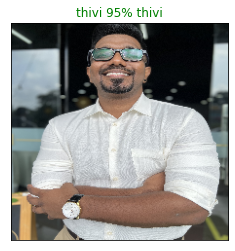

In [ ]:
plot_pred(prediction_probabilities=predictions , labels= labels , images = images, n= 19)

### Now we've got one function to visualize our model's top predictions.

Let's make another to view our model's top 10 predictions

This function will:

- take an input of prediction probabilities array, a ground truth and an integer
- find the prediction using get_pred_label()
- find the top 10:
- prediction probabilities indexes
- prediction probabilities values
- prediction labels
- plot the top 10 predicition probability label and values, and colouring the true label green.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  plus the top 10 highest prediction confidences along with the true label for sample n
  """
  pred_prob , true_label = prediction_probabilities[n] , labels[n]

  #Get the predicted label
  pred_label = get_pred_label(pred_prob)

  #Find the top 10 predictions confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  #Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes] 

  #Find the top 10 predcition labels
  top_10_pred_labels = unique_name[top_10_pred_indexes]

  #Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels= top_10_pred_labels,
             rotation = "vertical")
  
  #change colour for true label
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

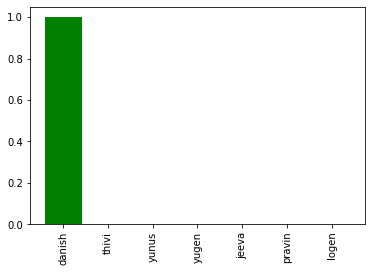

In [ ]:
plot_pred_conf(prediction_probabilities = predictions , labels = labels ,n=2)

In [ ]:
import matplotlib.pyplot as plt

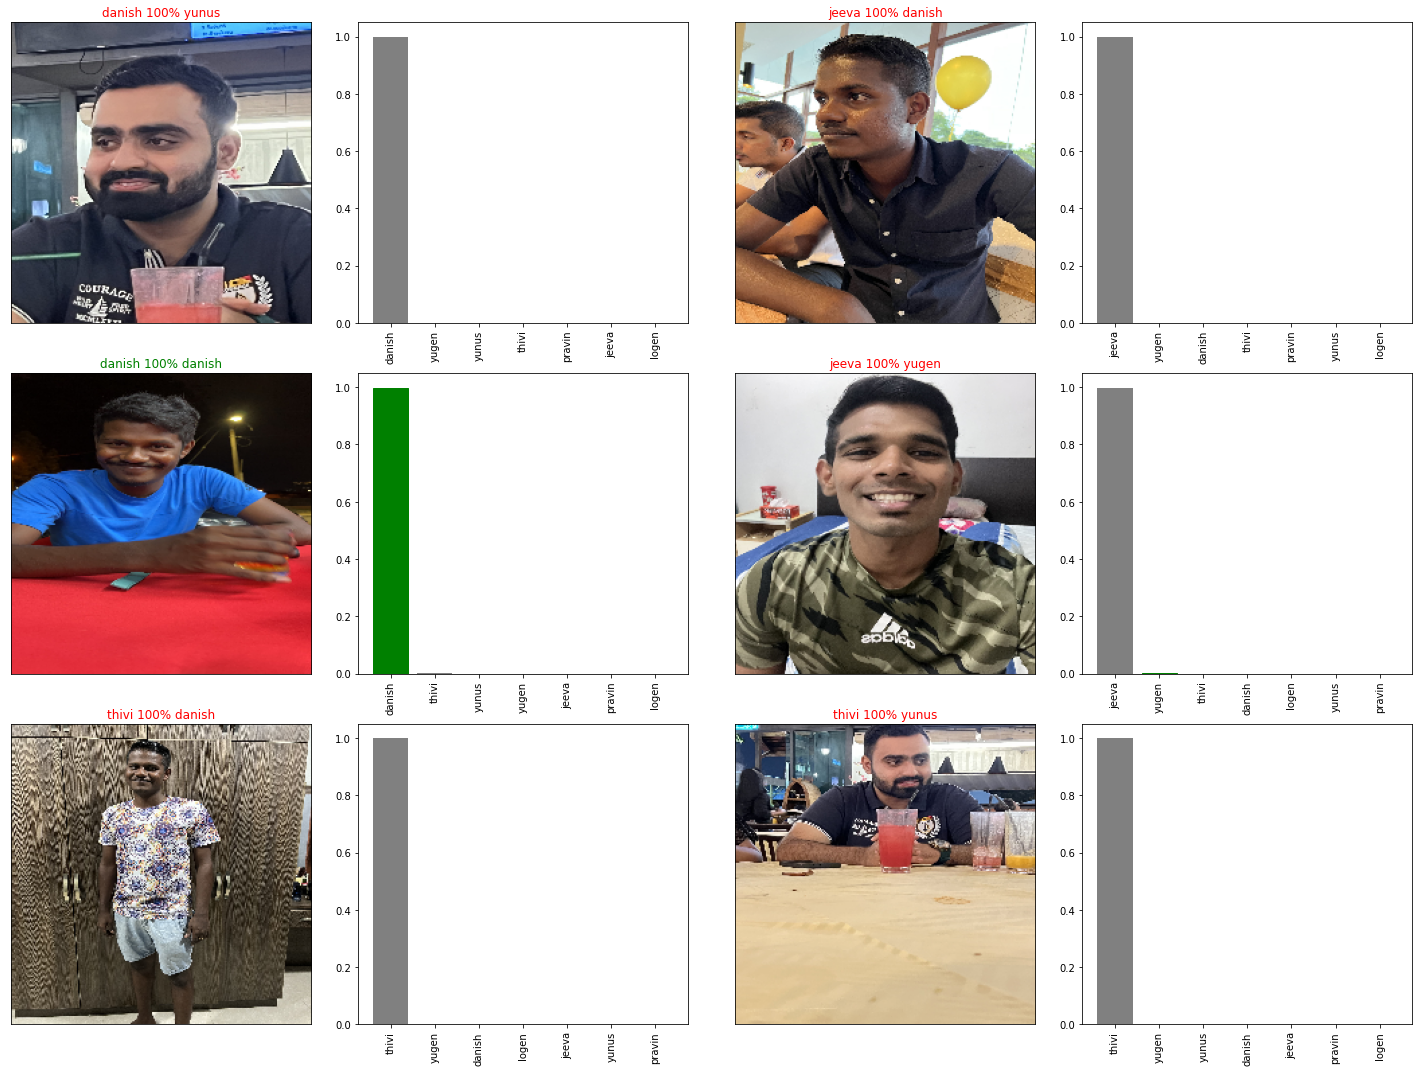

In [ ]:
#Lets check out a few predicitions and their values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols ,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities = predictions,
            labels = labels,
            images= images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels = labels,
                 n = i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
#create a fucntion to save a model
def save_model(model, suffix=None):
  """
  saves a given model in a mobile directory and appends a suffix (string)
  """
  #Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Yugen_Vision/models" , datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "_" + suffix + ".h5" #save format of a model
  print(f"saving model to: {model_path}..")
  model.save(model_path)
  return model_path


In [ ]:
 #create a function to load a trained model
def load_model(model_path):
   """
  Loads a model from saved path
   """
   print(f"load model from: {model_path} ")
   model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
   return model

In [ ]:
#save our model trained on 20 images
save_model(model , suffix="20-images-mobilenetv2-Adam")

saving model to: /content/drive/MyDrive/Yugen_Vision/models/20230302-06311677738718_20-images-mobilenetv2-Adam.h5..


'/content/drive/MyDrive/Yugen_Vision/models/20230302-06311677738718_20-images-mobilenetv2-Adam.h5'

### Making predicitions on test images
- convert test images into tensor batches same format as train data
- we have already created create_data_batches which can take a list of filename and convert them into tennsor batchesTo make predictions on test data:
- Get the test image filenames
- convert the file names into test data batches
- create_data_batches() and setting the test_data parameter to True since test data doesn't have labels.
- make predictions array by passing the test batches to the predict() method called on our model.